In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout




In [2]:
df = pd.read_csv('bank_data.csv',sep=';')
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
df.duplicated().sum()

0

In [6]:
df.shape

(41188, 21)

In [9]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(41176, 21)

In [13]:
uni = [df[i].unique() for i in df.columns]
uni

[array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
        49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
        28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
        77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
        74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64),
 array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['telephone', 'cellular'], dtype=object),
 array(['may',

In [14]:
df.select_dtypes(include='object').head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [15]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


In [17]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [18]:
df['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [19]:
df['marital'].value_counts(normalize=True)

married     0.605231
single      0.280843
divorced    0.111983
unknown     0.001943
Name: marital, dtype: float64

<AxesSubplot: title={'center': 'distribution'}>

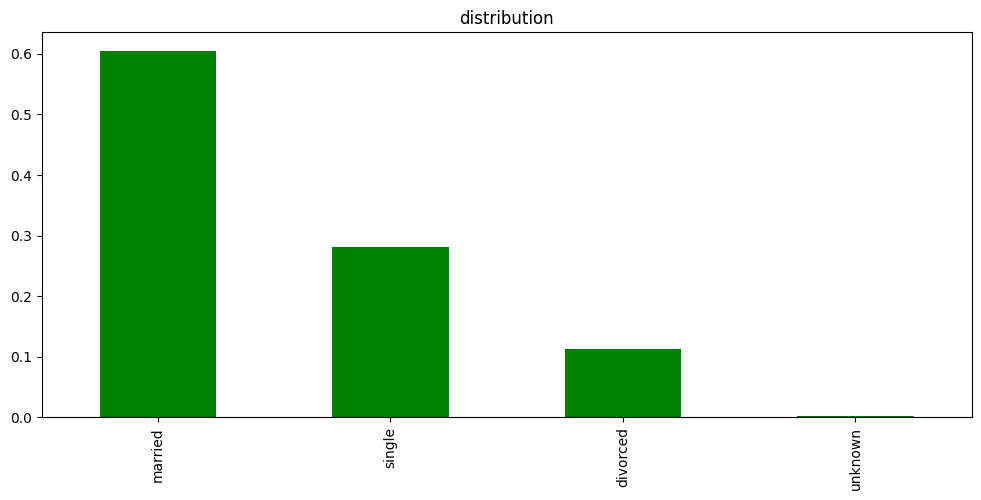

In [20]:
df['marital'].value_counts(normalize=True).plot(kind='bar',figsize=(12,5),title='distribution',cmap='ocean')


In [21]:
df.sort_values(by=['age','duration'],ascending=[True,False]).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no


In [22]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


<AxesSubplot: >

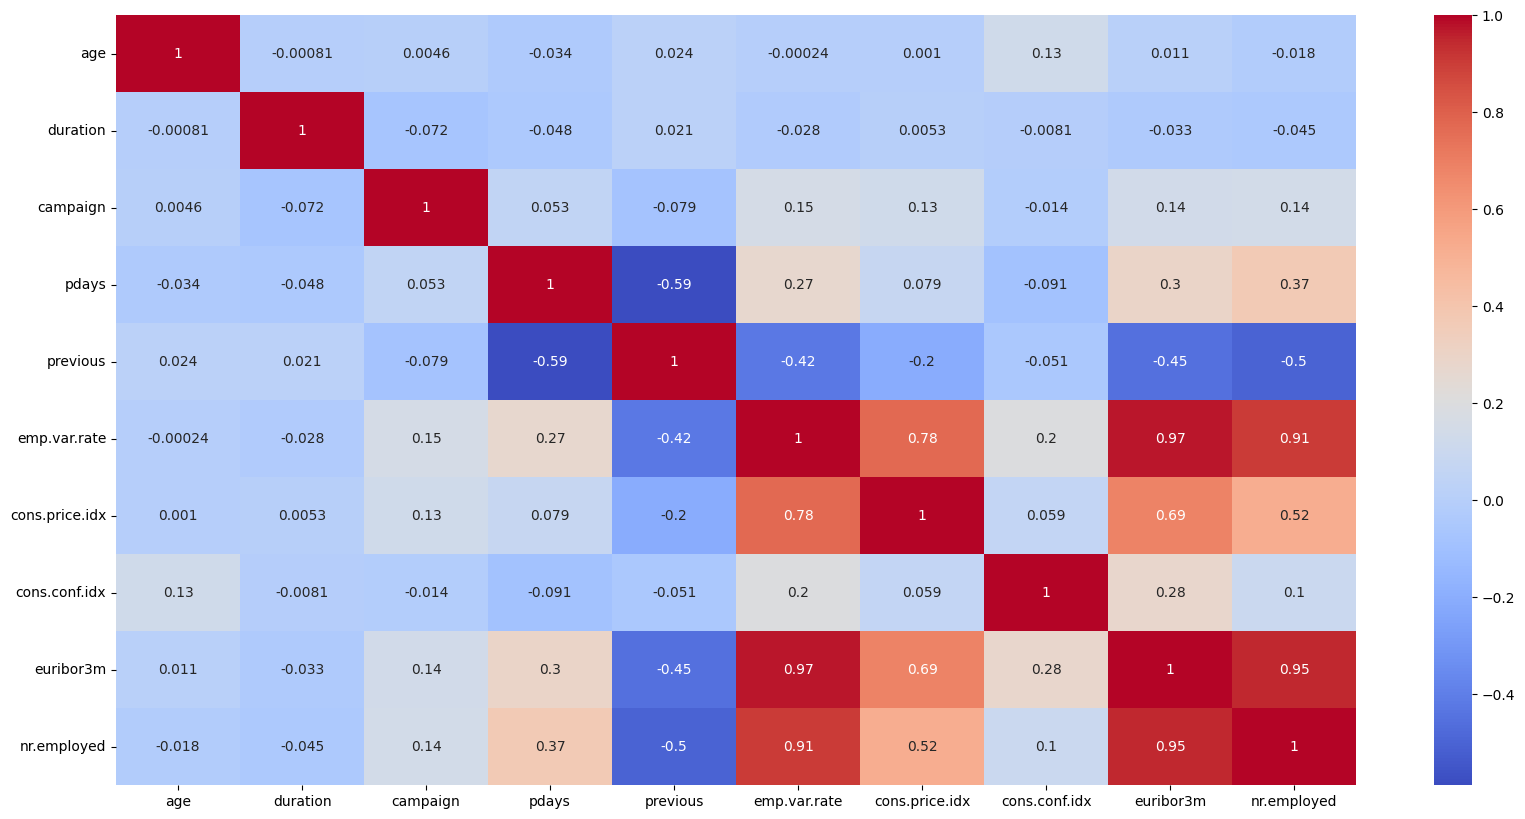

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap = 'coolwarm')





In [25]:
pd.crosstab(df['y'],df["marital"],normalize = 'index')

marital,divorced,married,single,unknown
y,,,,
no,0.113173,0.612803,0.272162,0.001861
yes,0.102608,0.545592,0.349213,0.002587


<function matplotlib.pyplot.show(close=None, block=None)>

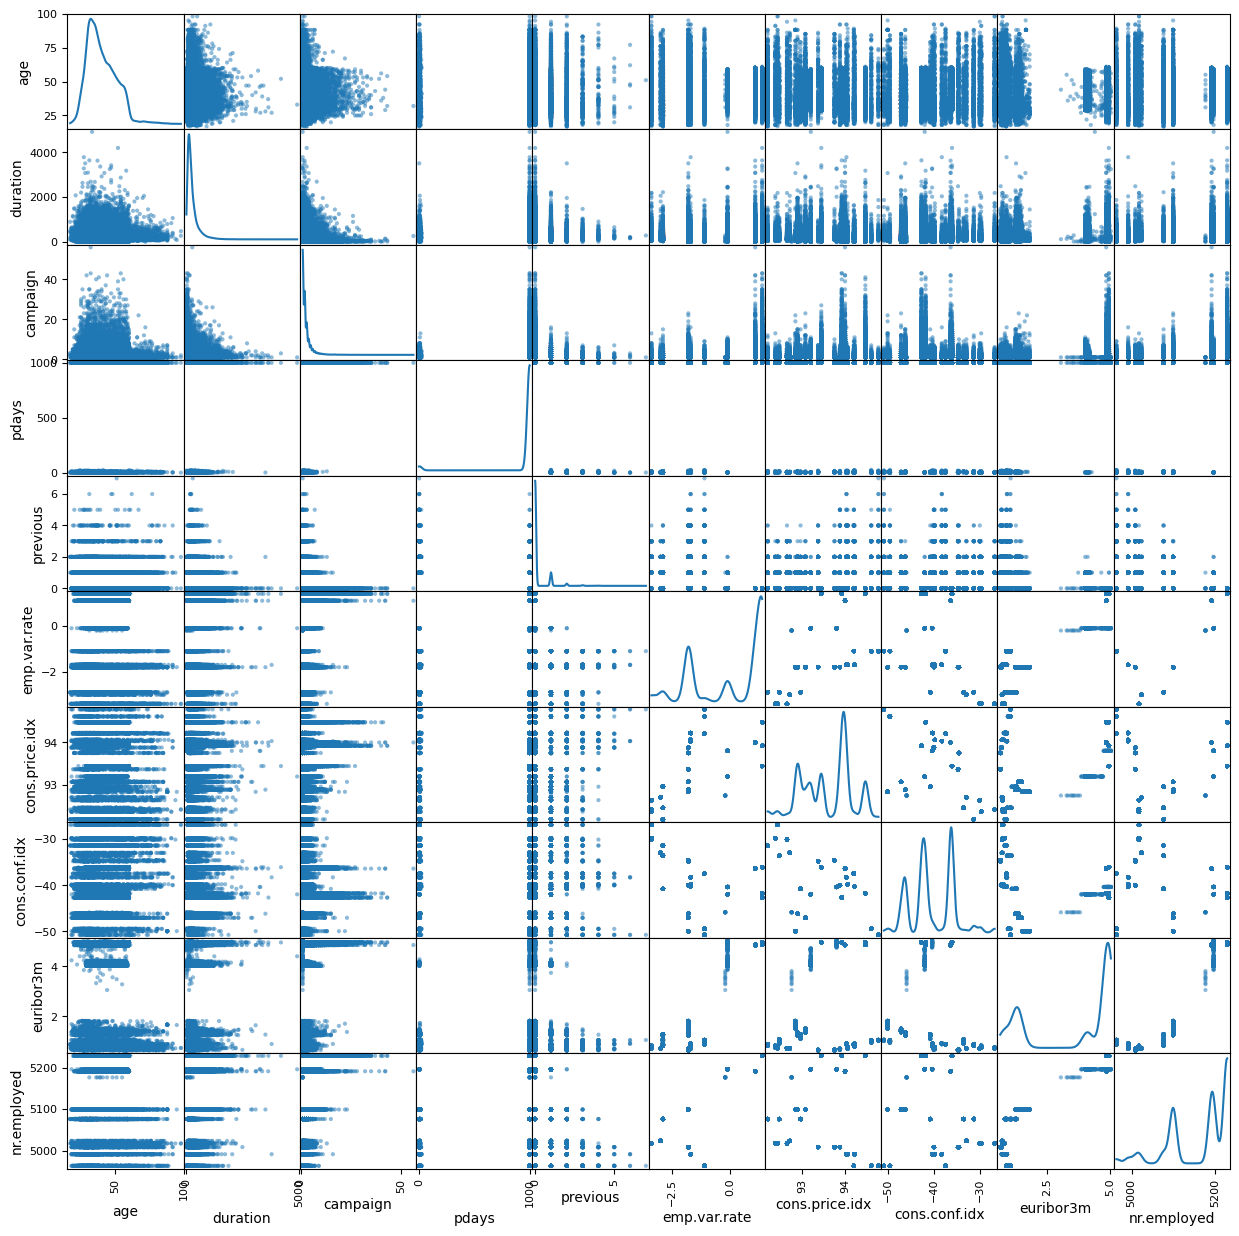

In [26]:
pd.plotting.scatter_matrix(df,figsize=(15,15),diagonal='kde',cmap='coolwarm')
plt.show

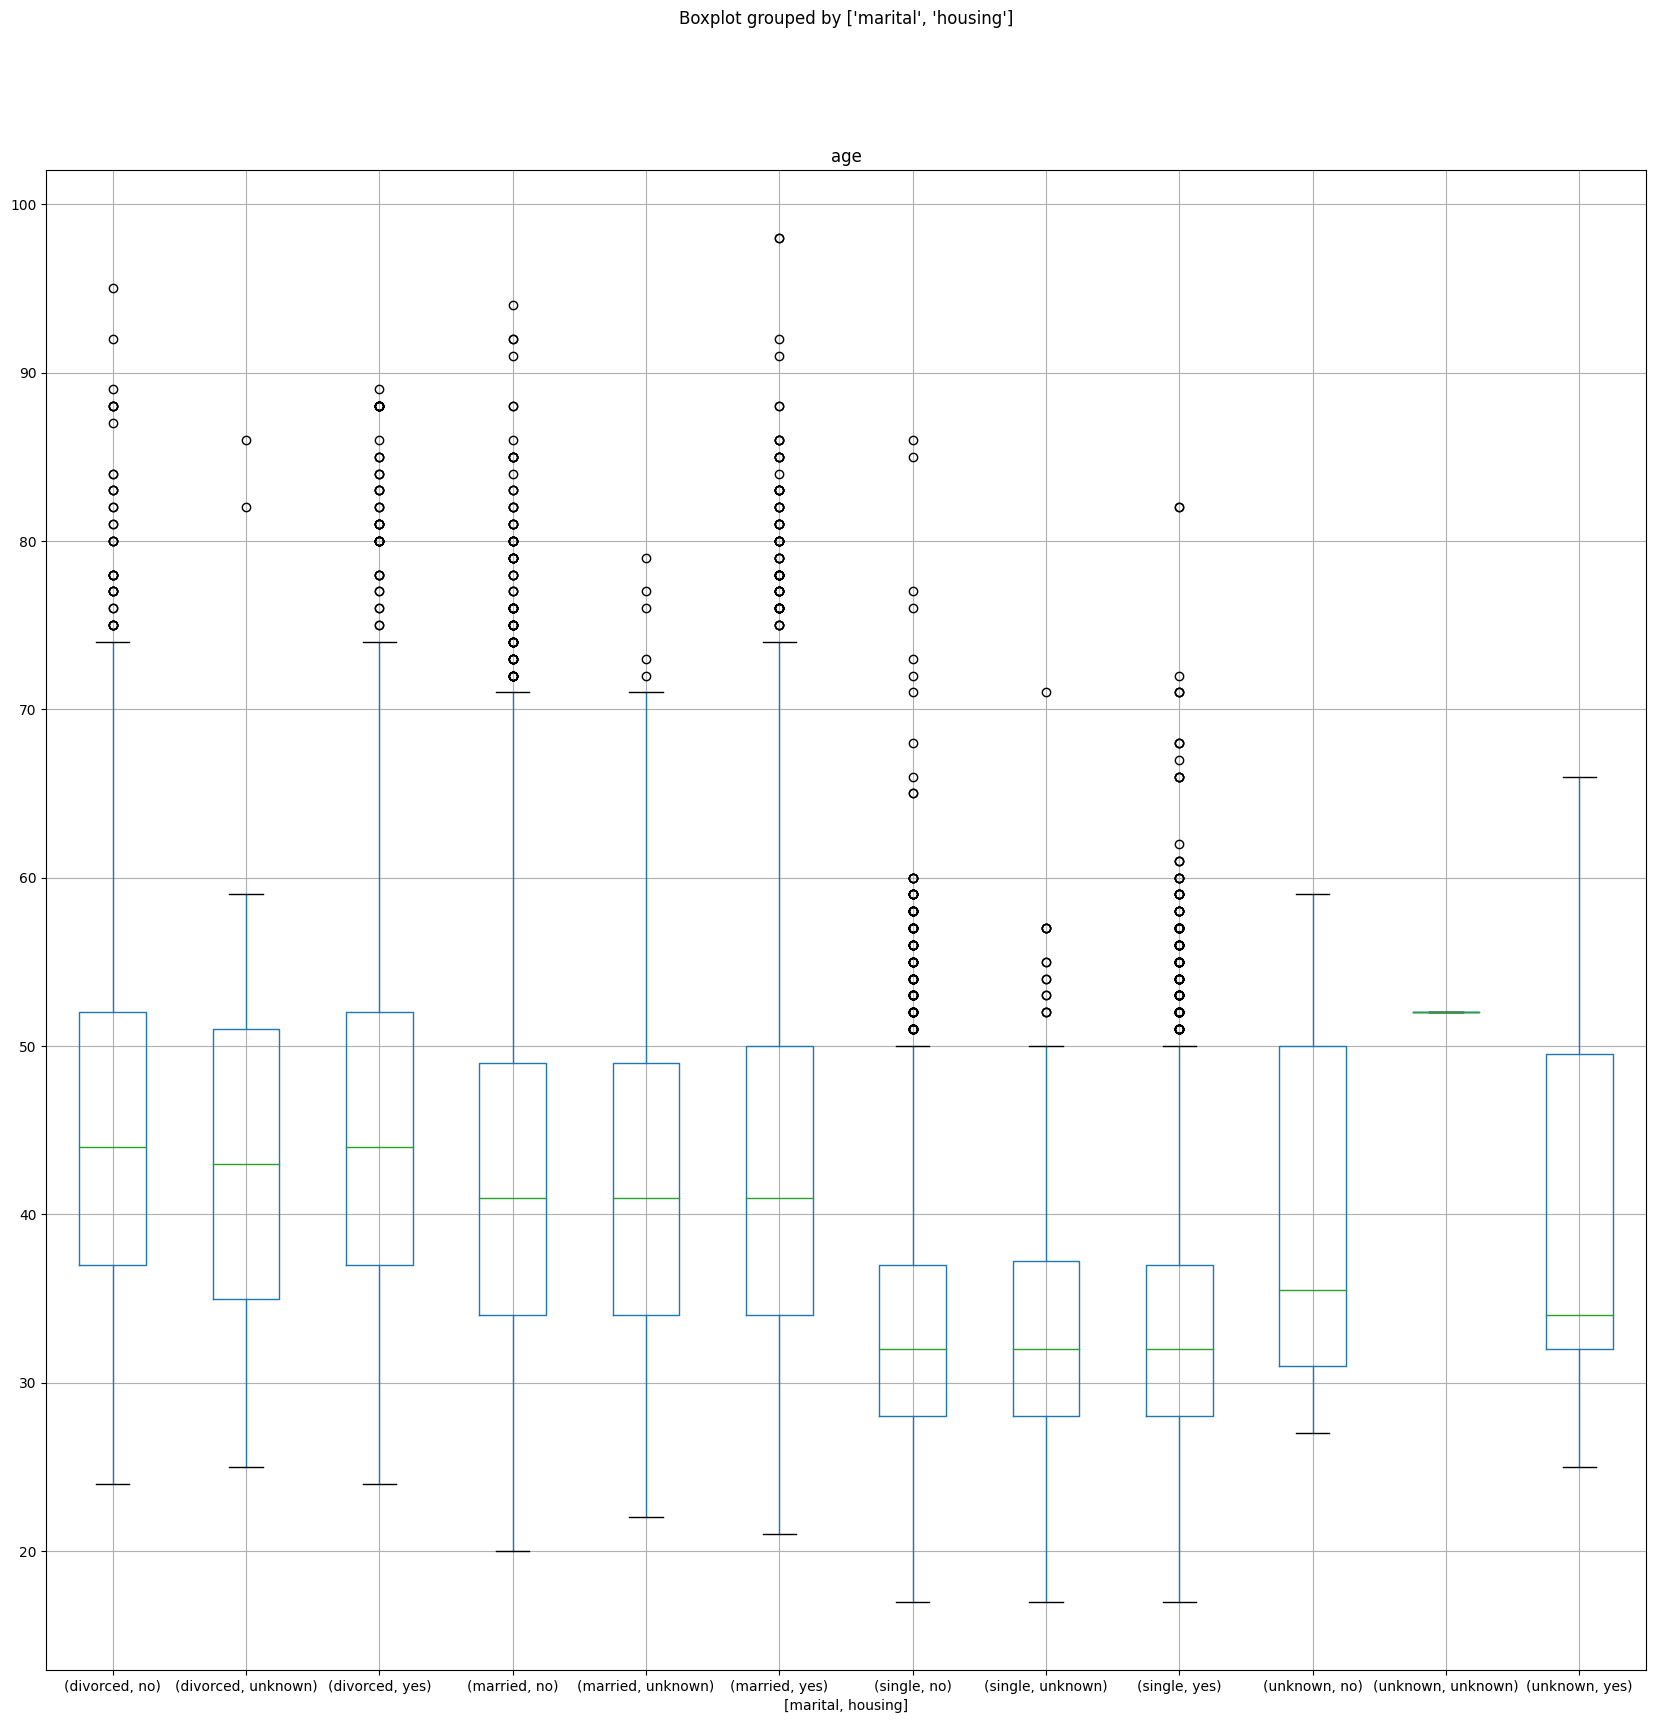

In [27]:
df.boxplot(column='age',by=['marital','housing'],figsize=(20,20))
plt.show()

In [28]:
df.sort_values(by = "campaign", ascending = False).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,56,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
13447,32,technician,single,university.degree,no,yes,yes,telephone,jul,wed,...,43,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18728,54,admin.,married,university.degree,unknown,yes,no,cellular,jul,thu,...,43,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
4168,29,technician,married,professional.course,no,yes,no,telephone,may,mon,...,42,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
5304,44,retired,married,basic.9y,no,yes,no,telephone,may,fri,...,42,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11033,38,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,...,41,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
18754,36,admin.,single,university.degree,no,no,no,cellular,jul,thu,...,40,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
11769,56,self-employed,married,professional.course,no,no,yes,telephone,jun,fri,...,40,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4114,52,entrepreneur,married,university.degree,no,no,no,telephone,may,mon,...,39,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
11593,43,technician,married,high.school,no,yes,no,telephone,jun,fri,...,37,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no


In [29]:
df.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc = ["mean", "count"],
)

mean            count         
                           age  campaign    age campaign
education                                               
basic.4y             47.596504  2.600575   4176     4176
basic.6y             40.449585  2.556962   2291     2291
basic.9y             39.061208  2.532341   6045     6045
high.school          37.996951  2.568860   9512     9512
illiterate           48.500000  2.277778     18       18
professional.course  40.083969  2.586832   5240     5240
university.degree    38.876356  2.563713  12164    12164
unknown              43.485549  2.597110   1730     1730

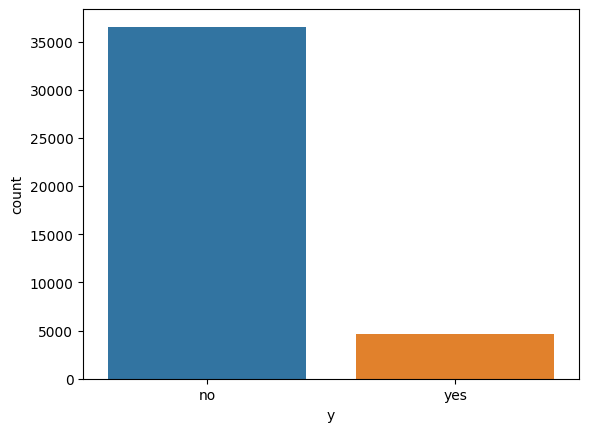

In [30]:
sns.countplot(x="y", data=df);

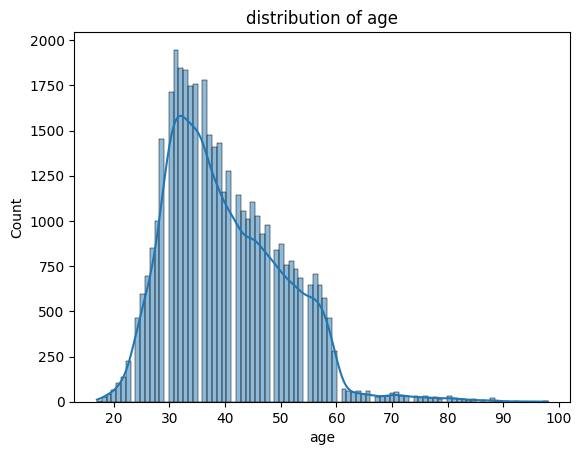

In [31]:
sns.histplot(df['age'],kde=True)
plt.title('distribution of age')
plt.show()





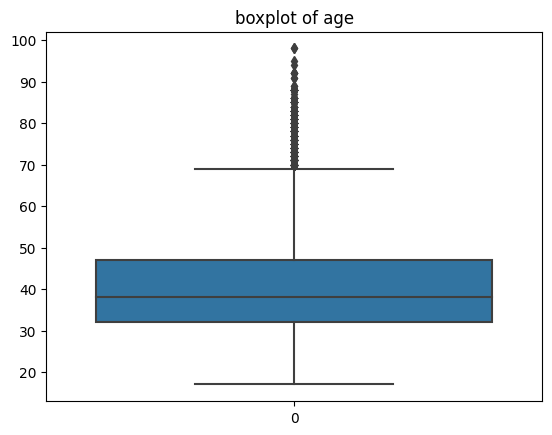

In [32]:
sns.boxplot(df['age'])
plt.title('boxplot of age')
plt.show()

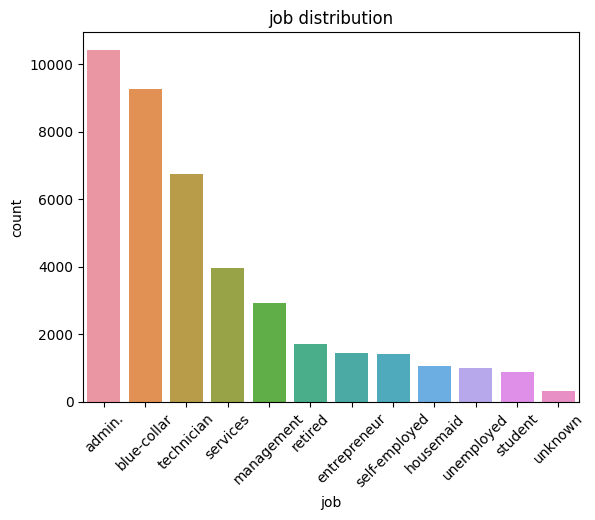

In [33]:
sns.countplot(x=df['job'],order=df['job'].value_counts().index)
plt.title('job distribution')
plt.xticks(rotation=45)
plt.show()



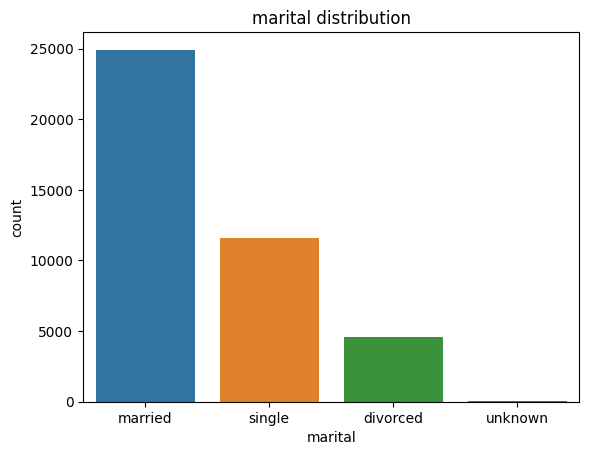

In [34]:
sns.countplot(data=df,x='marital')
plt.title('marital distribution')
plt.show()

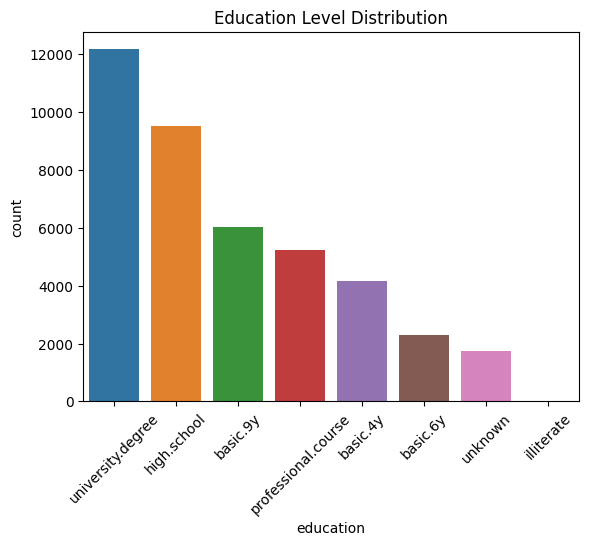

In [35]:
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xticks(rotation = 45)
plt.show()

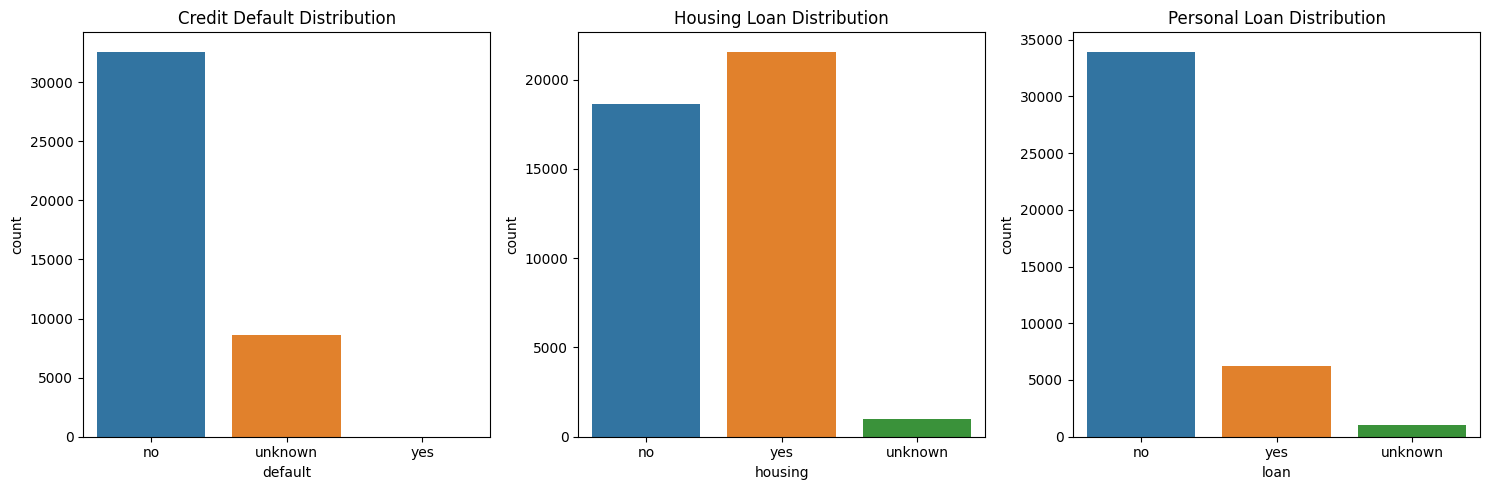

In [36]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))

sns.countplot(data=df, x='default', ax=ax[0])
ax[0].set_title('Credit Default Distribution')

sns.countplot(data=df, x='housing', ax=ax[1])
ax[1].set_title('Housing Loan Distribution')

sns.countplot(data=df, x='loan', ax=ax[2])
ax[2].set_title('Personal Loan Distribution')
plt.tight_layout()
plt.show()


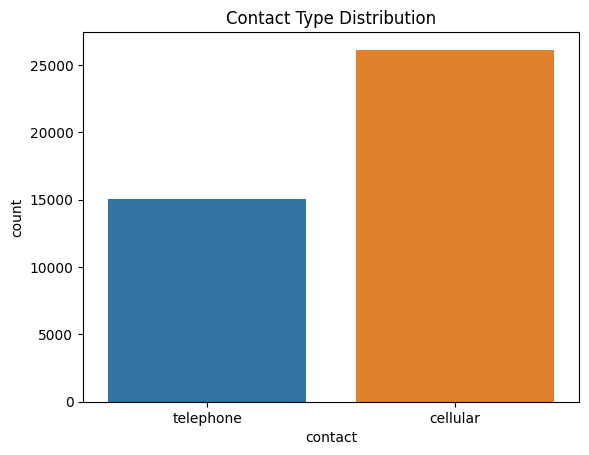

In [42]:
# 6. Contact
sns.countplot(data=df, x='contact')
plt.title('Contact Type Distribution')
plt.show()

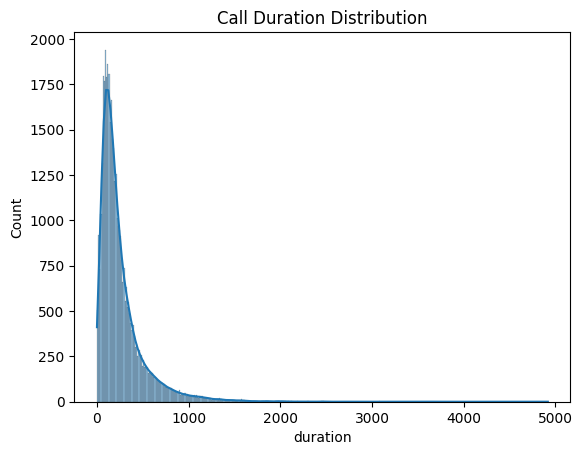

In [43]:
# 9. Duration
sns.histplot(df['duration'], kde=True)
plt.title('Call Duration Distribution')
plt.show()

In [39]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [40]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

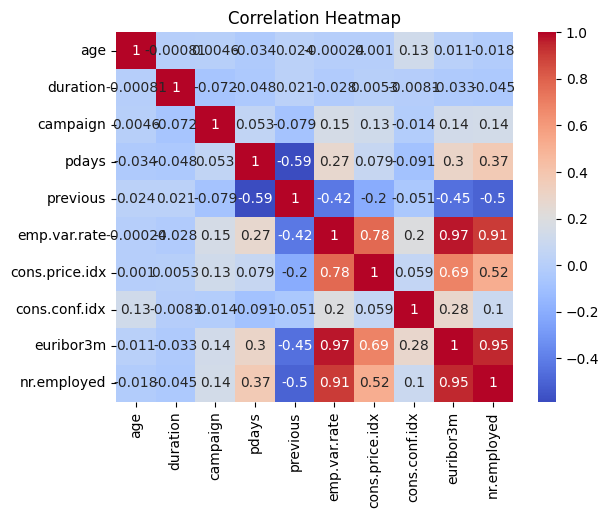

In [44]:
corr=df[numeric_cols].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [46]:
from sklearn.ensemble import RandomForestClassifier
# Assuming df is your DataFrame and 'y' is the target column
X = df[list(numeric_cols)]  # Convert to a list if needed

y=df['y'].map({'yes':1,'no':0})#converting yes
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X,y)
#extract feature importance
feature_importances=rf.feature_importances_

feature_importances




array([0.15441235, 0.41744279, 0.05763868, 0.04545652, 0.01947342,
       0.02034514, 0.02290078, 0.0260684 , 0.15174736, 0.08451455])

In [48]:
features_dict = dict(zip(X.columns,feature_importances))
#sorting and displaying the features by importance
sorted_features = sorted(features_dict.items(),key=lambda x:x[1],reverse=True)
print(sorted_features)



[('duration', 0.4174427870426388), ('age', 0.15441235310303944), ('euribor3m', 0.1517473643110309), ('nr.employed', 0.08451455255521037), ('campaign', 0.057638677693530496), ('pdays', 0.04545652444200162), ('cons.conf.idx', 0.02606840196721473), ('cons.price.idx', 0.02290077736326508), ('emp.var.rate', 0.02034514139617707), ('previous', 0.019473420125891382)]


In [49]:
numeric_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [50]:
#delete numerical columns less imaportance 
numeric_cols=numeric_cols[0:3]

numeric_cols


['age', 'duration', 'campaign']

In [51]:
df.drop(['campaign','pdays','cons.conf.idx','cons.price.idx','emp.var.rate','previous'],inplace=True,axis=1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,poutcome,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,nonexistent,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,nonexistent,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,nonexistent,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,nonexistent,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,nonexistent,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,nonexistent,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,nonexistent,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,nonexistent,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,nonexistent,1.028,4963.6,yes


In [52]:
df = pd.get_dummies(df,columns=non_numeric_cols,drop_first=True)


In [53]:
df.columns

Index(['age', 'duration', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

In [54]:
from sklearn.model_selection import train_test_split
X = df.drop('y_yes',axis=1)
y=df['y_yes']

y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y_yes, Length: 41176, dtype: uint8

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42,stratify=y,shuffle=True)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)




In [57]:
smote=SMOTE(sampling_strategy='auto',random_state = 42)
x_train,y_train = smote.fit_resample(x_train,y_train)

In [58]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense

def create_model():
    model = Sequential()
    model.add(layers.Dense(256,input_dim=x_train.shape[1],activation='relu',kernel_initializer = 'he_uniform'))
    model.add(Dropout(.3))

    model.add(layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(.3))
    
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    
    
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    
    optimizer = Adam(learning_rate=.001)
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model
    

early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)


#define k-fold cross-validation
kf = KFold(n_splits=3,shuffle=True,random_state=42)
train_acc_scores =[]
test_acc_scores=[]

for fold,(train_index,test_index) in enumerate(kf.split(x_train),1):
    x_train_fold,x_val_fold = x_train[train_index],x_train[test_index]
    y_train_fold,y_val_fold = y_train[train_index],y_train[test_index]
    
    #Create and compile the model
    model=create_model()
    
    
    #train the model with early stopping
    history =model.fit(
        x_train_fold,y_train_fold,epochs=20,batch_size=32,verbose=1,validation_data=(x_val_fold,y_val_fold),
        callbacks=[early_stopping] #add the early stopping callback
    )
    #evaluate training data
    train_acc = model.evaluate(x_train_fold,y_train_fold,verbose=0)[1]
    train_acc_scores.append(train_acc)
    
    #Evaluate on validation data
    val_acc = model.evaluate(x_val_fold,y_val_fold,verbose=0)[1]
    test_acc_scores.append(val_acc)
    print(f'Fold >>{fold} completed.')
    
    


#calculate and print the average accuracy scores
avg_train_acc = np.mean(train_acc_scores)
avg_test_acc = np.mean(test_acc_scores)
print(f'Average training accuracy : {avg_train_acc}')
print(f'average validation accuracy : {avg_test_acc}')
#evaluate on the test set
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f'test loss :{test_loss}')
print(f'test accuracy :{test_acc}')



Epoch 1/20


1066/1066 [==============================] - 40s 10ms/step - loss: 0.4529 - accuracy: 0.7980 - val_loss: 0.2986 - val_accuracy: 0.8823
Epoch 2/20
1066/1066 [==============================] - 9s 9ms/step - loss: 0.3192 - accuracy: 0.8787 - val_loss: 0.3096 - val_accuracy: 0.8904
Epoch 3/20
1066/1066 [==============================] - 9s 9ms/step - loss: 0.2931 - accuracy: 0.8885 - val_loss: 0.2757 - val_accuracy: 0.8947
Epoch 4/20
1066/1066 [==============================] - 9s 8ms/step - loss: 0.2775 - accuracy: 0.8943 - val_loss: 0.2634 - val_accuracy: 0.8981
Epoch 5/20
1066/1066 [==============================] - 8s 8ms/step - loss: 0.2656 - accuracy: 0.9007 - val_loss: 0.2543 - val_accuracy: 0.9021
Epoch 6/20
1066/1066 [==============================] - 9s 8ms/step - loss: 0.2578 - accuracy: 0.9029 - val_loss: 0.2459 - val_accuracy: 0.9063
Epoch 7/20
1066/1066 [==============================] - 9s 9ms/step - loss: 0.2487 - accuracy: 0.9063 - val_loss: 0.2459 - val_accu

In [59]:
y_pred=(model.predict(x_test)>.5).astype(int)

387/387 [==============================] - 2s 3ms/step


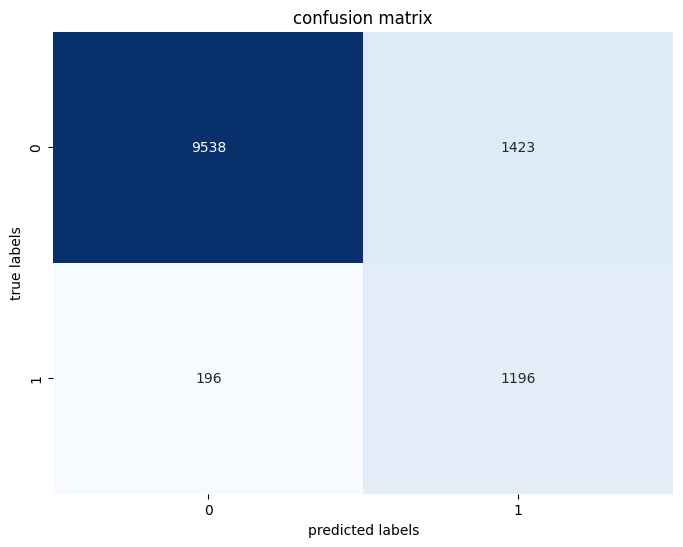

In [60]:
from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)

#plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',cbar=False)
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.title('confusion matrix')
plt.show()


In [61]:
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
model.save('bank_model.h5')

In [62]:
#load the model
loaded_model = load_model('bank_model.h5')

In [63]:
predictions = (loaded_model.predict(x_test)>.5).astype(int)
predictions

387/387 [==============================] - 1s 3ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])